##
- HofKonditorei = home made patisserie
- Trockenprodukte = dry product (ex. honey, jam, ...)
- Non-food ex. Glass, PET
- Erlebnis = Aventure (kids gardening)
- Getranke = Drinks 
- Obst = fruit
- HofChuchi = Home made meal
- Frischprodukte = fresh product 
- HofBäckerei = home made bakery
- Gemüse = vegetables



In [57]:
import pandas as pd
import numpy as np
import time

In [58]:
df_J = pd.read_csv('data/POS-data_Juckerhof.csv', sep=";", encoding='latin1')
df_B = pd.read_csv('data/POS-data_Baechlihof.csv', sep=";", encoding='latin1')

# concatenate both datasets
res = pd.concat([df_J, df_B])

# addind dummy variables for time 
res['wday'] = res['timestamp'].apply(lambda x: time.gmtime(x).tm_wday) 
res['month'] = res['timestamp'].apply(lambda x: time.gmtime(x).tm_mon) 
res['hour'] = res['timestamp'].apply(lambda x: time.gmtime(x).tm_hour if time.gmtime(x).tm_min <= 30 else time.gmtime(x).tm_hour + 1)
res['mday'] = res['timestamp'].apply(lambda x: time.gmtime(x).tm_mday) 
res['year'] = res['timestamp'].apply(lambda x: time.gmtime(x).tm_year)

res['ratio_vat'] = res['vat_pos']/res['price']




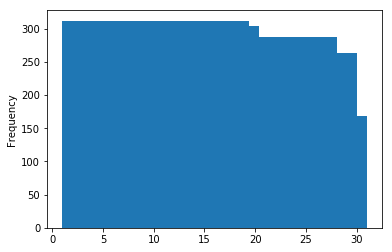

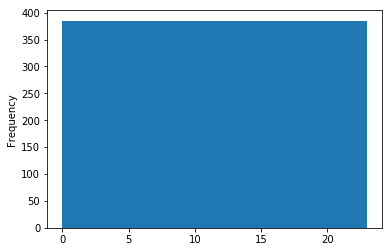

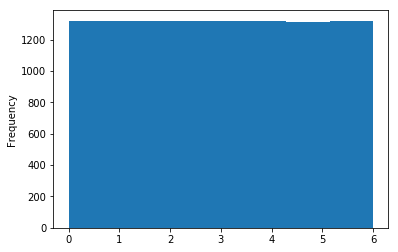

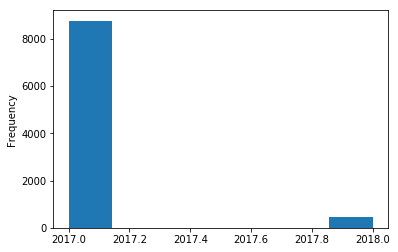

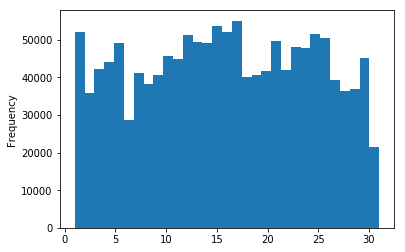

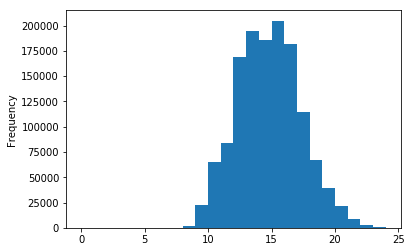

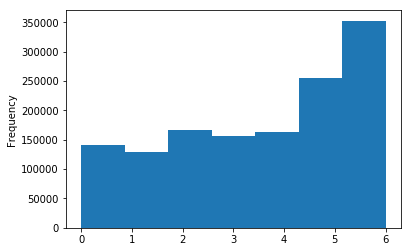

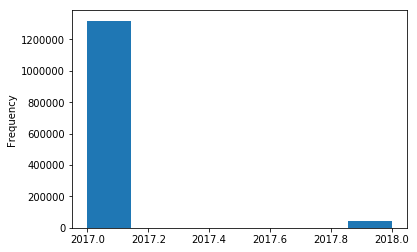

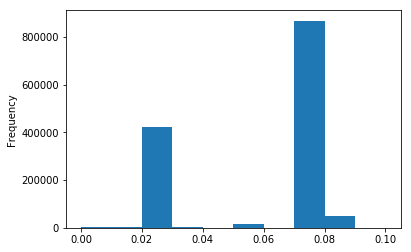

In [59]:
import matplotlib.pyplot as plt

res['ratio_vat'].plot.hist()
plt.show()

In [60]:
#res['ratio_vat']
res['is_resto'] = res['ratio_vat'] < 0.05
res['is_resto']

0          True
1         False
2          True
3         False
4         False
5         False
6         False
7         False
8          True
9          True
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
446668     True
446669     True
446670     True
446671     True
446672     True
446673     True
446674     True
446675    False
446676     True
446677     True
446678    False
446679     True
446680     True
446681     True
446682     True
446683     True
446684     True
446685     True
446686     True
446687     True
446688    False
446689    False
446690     True
446691     True
446692     True
446693     True
446694     True
446695     True
446696    False
446697    False
Name: is_resto, Length: 

In [61]:
df_m = pd.read_csv('data/weather-data.csv',sep=';')

# df_m.col

df_m['wday'] = df_m['date'].apply(lambda x: time.gmtime(x).tm_wday) 
df_m['month'] = df_m['date'].apply(lambda x: time.gmtime(x).tm_mon) 
df_m['hour'] = df_m['date'].apply(lambda x: time.gmtime(x).tm_hour if time.gmtime(x).tm_min <= 30 else time.gmtime(x).tm_hour + 1)
# df_m['min'] = df_m['date'].apply(lambda x: time.gmtime(x).tm_min)

df_m['mday'] = df_m['date'].apply(lambda x: time.gmtime(x).tm_mday) 
df_m['year'] = df_m['date'].apply(lambda x: time.gmtime(x).tm_year)


In [62]:
# df_m['min']

In [63]:
def plot_date(df):
    df.mday.plot.hist(bins=31)
    plt.figure()
    df.hour.plot.hist(bins=24)
    plt.figure()
    df.wday.plot.hist(bins=7)
    plt.figure()
    df.year.plot.hist(bins=7)
    plt.figure()
    print('unique mday',df.mday.unique())
    print('unique hour',df.hour.unique())
    print('unique wday',df.wday.unique())
    

In [64]:
plot_date(df_m)

('unique mday', array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]))
('unique hour', array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23]))
('unique wday', array([6, 0, 1, 2, 3, 4, 5]))


In [65]:
plot_date(res)

('unique mday', array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]))
('unique hour', array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 23, 19, 24,  0, 20,  7,
       21, 22,  1,  2]))
('unique wday', array([2, 3, 4, 5, 6, 0, 1]))


In [66]:
res.article.unique()

array([u'Mineral Personal', u'Eier gef\xe4rbt / gekocht',
       u'Br\xf6tli vom Hof', ..., u'Rafzer Knoblauch mit Kr\xe4uter 200g',
       u'Loyalty Aufladung 1288607233979363',
       u'Loyalty Aufladung 1288607235900566'], dtype=object)

In [67]:
res_w = pd.merge(res,df_m,on=['month','hour','mday','year'],how='left')

In [68]:
# res_w

In [69]:
index = ['article_group0','month','hour','mday','year','is_resto','shop']
grouby = []
for col in index:
    res_w[col+"_idx"] = res_w[col]
    grouby.append(col+"_idx")

In [70]:
gb = res_w.groupby(grouby)

In [71]:
# # gb['temperature'].isna().sum()
# missing_meteo = res_w[res_w[ 'temperature' ].isna()]
# missing_meteo.plot.scatter( 'month' , 'year')


In [72]:
# df_m.plot.scatter('month','yeardf_m
df_m.columns

Index([u'date', u'temperature', u'precipitation', u'snowfraction',
       u'sealevelpressure', u'winddirection', u'windspeed',
       u'relativehumidity', u'sunshinetime', u'totalcloudcover', u'lowclouds',
       u'midclouds', u'highclouds', u'wday', u'month', u'hour', u'mday',
       u'year'],
      dtype='object')

In [73]:
# df_m[ (df_m.year == 2018) & (df_m.month == 1) ].mday.hist()

features = ['temperature', 'precipitation', 'snowfraction',
       'sealevelpressure', 'winddirection', 'windspeed', 'relativehumidity',
       'sunshinetime', 'totalcloudcover', 'lowclouds', 'midclouds',
       'highclouds', 'wday_x', 'month', 'hour', 'mday', 'year'] + index

In [74]:
df_features = gb[features].mean()

In [75]:
df_features['price'] = gb['price'].sum()
df_features['count'] = gb['count'].sum()

In [76]:
df_features['n_transactions'] = gb['transaction_id'].unique().apply(lambda x: len(x))

In [77]:
# tot_price = res_w.groupby(['article_group0','month','hour','mday','year','transaction_id']).price.sum()

In [78]:
# tot_price.loc['Getränke'].hist(bins=100,range=[0,100]);
# # plt.yscale('log')

In [79]:
# tot_price = res_w.groupby(['article_group0','hour']).price.sum()

In [80]:
# tot_price.loc['Getränke'].plot()

In [81]:
# gdf = res_w.groupby(['article_group0','hour'])['sunshinetime','precipitation','temperature'].mean()

In [82]:
# df_m['temperature'].isna().sum()

In [83]:
# df_m['sunshinetime'].isna().sum()

In [84]:
df_features

temperature  \
article_group0_idx month_idx hour_idx mday_idx year_idx is_resto_idx shop_idx                           
Erlebnis           1         11       1        2018     True         Juckerhof Seegräben         6.88   
                                      6        2018     True         Juckerhof Seegräben         8.72   
                                      7        2018     True         Juckerhof Seegräben         9.64   
                                      9        2018     True         Juckerhof Seegräben         6.78   
                                      10       2018     True         Juckerhof Seegräben         7.53   
                                      14       2018     True         Juckerhof Seegräben         3.52   
                                      20       2018     True         Juckerhof Seegräben         6.25   
                                      21       2018     True         Juckerhof Seegräben          NaN   
                                      23       2018     True         Juckerhof Seegräben          NaN   
                             12       1        2018     True         Juckerhof Seegräben         7.35   
                                      5        2018     True         Juckerhof Seegräben        12.56   
                                      6        2018     True         Juckerhof Seegräben         9.71   
                                      13       2018     True         Juckerhof Seegräben         4.55   
                                      14       2018     True         Juckerhof Seegräben         5.37   
                                      21       2018     True         Juckerhof Seegräben          NaN   
                                      24       2018     True         Juckerhof Seegräben          NaN   
                             13       5        2018     True         Juckerhof Seegräben        12.90   
                                      6        2018     True         Juckerhof Seegräben        10.54   
                                      7        2018     True         Juckerhof Seegräben        13.96   
                                      14       2018     True         Juckerhof Seegräben         6.33   
                             14       1        2018     True         Juckerhof Seegräben         7.77   
                                      5        2018     True         Juckerhof Seegräben        13.01   
                                      6        2018     True         Juckerhof Seegräben        11.00   
                                      7        2018     True         Juckerhof Seegräben        13.54   
                                      8        2018     True         Juckerhof Seegräben        13.42   
                                      12       2018     True         Juckerhof Seegräben         5.04   
                                      14       2018     True         Juckerhof Seegräben         6.16   
                                      20       2018     True         Juckerhof Seegräben         6.02   
                                      21       2018     True         Juckerhof Seegräben          NaN   
                                      23       2018     True         Juckerhof Seegräben          NaN   
...                                                                                               ...   
Trockenprodukte    12        17       21       2017     False        Juckerhof Bächlihof         4.26   
                                                        True         Juckerhof Bächlihof         4.26   
                                                                     Juckerhof Seegräben         4.26   
                                      22       2017     True         Juckerhof Seegräben         5.91   
                                      23       2017     True         Juckerhof Bächlihof         6.41   
                                      25       2017     True         Juckerhof Seegräben         5.9